# Fake News Classifier using TF-IDF

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#reading the dataset
df = pd.read_csv('train.csv')

In [3]:
#checking all data is correct or not
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#checking all data is correct or not
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
#Get the independent feature
X = df.drop('label',axis=1)

In [6]:
#printinf the X
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
#Get the dependent feature
y = df['label']

In [8]:
#printing the y
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
#checking the shape of the dataset
df.shape

(20800, 5)

In [10]:
#importing the libraries to create bag of words 
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#checking null values
df = df.dropna()
df.isnull().sum()

#shaping y
y = df['label']

In [12]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
#for security of data
message = df.copy()

In [14]:
#After dropping some values, we have empty index an to fill
message.reset_index(inplace=True)

In [15]:
#cleaning the text (lowering)
import re

#PorterStemmer is used to get the word stem
from nltk.stem.porter import PorterStemmer

#stopwords helps us to remove the words like 'for', 'then', 'from', 'and' which are repeting again and again
#which does not put much value to identify sentance
from nltk.corpus import stopwords

In [16]:
#creating objects for PorterStemmer
stemmer = PorterStemmer()

#After cleaning the text we are going to store final result to corpus
corpus = []

In [17]:
#words are not clear hence we do lemmatization.

#Cleaning text lemmatization
for i in range(len(message)):
    
    #replacing all other information like '. ,'  with space
    review = re.sub('[^a-zA-Z]',' ', message['text'][i])      
    
    #lowering the sentances
    review = review.lower()
    
    #spliting the sentance to get the words
    review = review.split()
    
    #list comprehension (stemming)
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    #joining all the list of words to review
    review = ' '.join(review)
    
    #appending all the words to corpus
    corpus.append(review)

In [18]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [19]:
#creating TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Creating Object for TF-IDF
object_TF_IDF = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

#converting our list of words to TF-IDF
X = object_TF_IDF.fit_transform(corpus).toarray()

In [20]:
#Checking the shape of TF-IDF matrix
X.shape

(18285, 5000)

In [21]:
#taking all the lable values to y
y = message['label']

In [22]:
#Divide the model to test the data
from sklearn.model_selection import train_test_split

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
#featuress names on which we can classify
object_TF_IDF.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [24]:
# getting parameters
object_TF_IDF.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [25]:
#TF-IDF Matrix matrix
count_df = pd.DataFrame(X_train,columns=object_TF_IDF.get_feature_names())

In [26]:
#printing the matrix
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#importing the matplot lib
import matplotlib.pyplot as plt

In [28]:
#Ploting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
#Multinormial Naive Baise as classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [30]:
#importing libraries
from sklearn import metrics
import itertools

Accuracy : - 0.900
Confusion matrix, without normalization


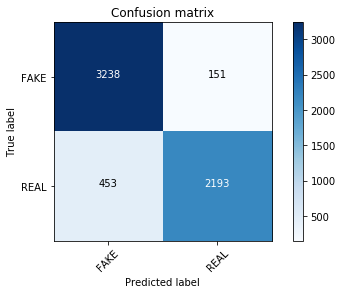

In [31]:
#building the confusion matrix
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy : - %0.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [32]:
#Passive aggressive classifier algo
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.952
Confusion matrix, without normalization


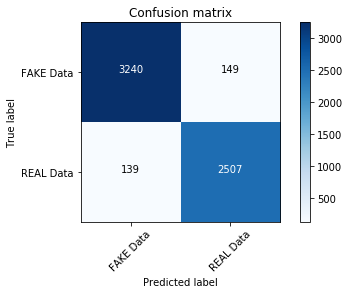

In [33]:
#builing model and confusion matrix
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [34]:
#Naive baise classifier with hyperparameter
classifier=MultinomialNB(alpha=0.1)

In [35]:
#building model with alpha value
previous_score=0
for alpha in np.arange(0,1,0.1):
    
    #creating sub - classfier
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    #if previous score is less than score then replace the classifier as sub classifier to get best output
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}\t\t, Score : {}\t".format(alpha,score))

F:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0		, Score : 0.9022369511184756	
Alpha: 0.1		, Score : 0.9017398508699255	
Alpha: 0.2		, Score : 0.9020712510356255	
Alpha: 0.30000000000000004		, Score : 0.9022369511184756	
Alpha: 0.4		, Score : 0.9020712510356255	
Alpha: 0.5		, Score : 0.9014084507042254	
Alpha: 0.6000000000000001		, Score : 0.9015741507870754	
Alpha: 0.7000000000000001		, Score : 0.9012427506213753	
Alpha: 0.8		, Score : 0.9009113504556753	
Alpha: 0.9		, Score : 0.9005799502899752	


In [36]:
#Get feature name to identify which word is fake or real
feature_name = object_TF_IDF.get_feature_names()

In [37]:
#coefficient values
classifier.coef_[0]

array([-9.52147382, -8.98567005, -8.75019038, ..., -9.00768675,
       -8.29304531, -8.47560634])

In [38]:
#most negative value is the most fakest value

#most real
sorted(zip(classifier.coef_[0],feature_name),reverse=True)[:20]

[(-5.4005731761463736, 'clinton'),
 (-5.504449523154856, 'trump'),
 (-5.689699395630465, 'hillari'),
 (-5.927658316663332, 'us'),
 (-5.943924155634382, 'elect'),
 (-6.141141898356725, 'peopl'),
 (-6.153679149791046, 'vote'),
 (-6.1855372689534684, 'state'),
 (-6.209385038898738, 'email'),
 (-6.23107056925912, 'one'),
 (-6.304754452471091, 'hillari clinton'),
 (-6.30763946084777, 'fbi'),
 (-6.325864550609382, 'would'),
 (-6.334934576217139, 'like'),
 (-6.373788650596871, 'american'),
 (-6.392869520601681, 'time'),
 (-6.398029580588211, 'war'),
 (-6.415258514684246, 'world'),
 (-6.450564452209333, 'year'),
 (-6.459455119306126, 'octob')]

In [39]:
#most fakest
sorted(zip(classifier.coef_[0],feature_name))[:20]

[(-10.991740188222842, 'brief post'),
 (-10.991740188222842, 'follow pam'),
 (-10.991740188222842, 'follow pam key'),
 (-10.991740188222842, 'gold medal'),
 (-10.991740188222842, 'gorsuch'),
 (-10.991740188222842, 'judg gorsuch'),
 (-10.991740188222842, 'key twitter'),
 (-10.991740188222842, 'key twitter pamkeynen'),
 (-10.991740188222842, 'morn brief'),
 (-10.991740188222842, 'mr ail'),
 (-10.991740188222842, 'mr bannon'),
 (-10.991740188222842, 'mr castro'),
 (-10.991740188222842, 'mr christi'),
 (-10.991740188222842, 'mr cruz'),
 (-10.991740188222842, 'mr de'),
 (-10.991740188222842, 'mr flynn'),
 (-10.991740188222842, 'mr kushner'),
 (-10.991740188222842, 'mr roof'),
 (-10.991740188222842, 'mr sander'),
 (-10.991740188222842, 'mr scott')]